# Applying and Evaluating Machine Learning Model

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [2]:
# Loading the cleaned dataset 
df = pd.read_csv('Titanic_cleaned.csv')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
845,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
846,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
847,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
848,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<h3>Encoding and Normalizing the datasets</h3>

In [3]:
# One hot encoding - Encode the categorical variables into numeric
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
df_encoded.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [11]:
# Normalize Numerical Features
scaler = StandardScaler()
df_encoded[['Age', 'Fare']] = scaler.fit_transform(df_encoded[['Age', 'Fare']])
df_encoded.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",-0.548297,1,0,A/5 21171,-0.648446,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.733240,1,0,PC 17599,1.514456,0,0,0
2,1,3,"Heikkinen, Miss. Laina",-0.227913,0,0,STON/O2. 3101282,-0.625646,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.492952,1,0,113803,0.900264,0,0,1
4,0,3,"Allen, Mr. William Henry",0.492952,0,0,373450,-0.621424,1,0,1


In [12]:
# Preparing data for the model
X = df_encoded.drop(columns=['Name', 'Ticket','Survived'])
y = df_encoded['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
845    0
846    1
847    0
848    1
849    0
Name: Survived, Length: 850, dtype: int64

<h3>Separating dataset into train and test sets (80-20)ratio</h3>

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Defining the model-- Chosed Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

<h3>Training and Predicting the model</h3>

In [20]:
# Training the model
model.fit(X_train, y_train)

# Predicting the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # for ROC AUC

<H3>Calculating the accuracies to predict the model</H3>

In [21]:
# Step 9: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8118
Precision: 0.7414
Recall: 0.7167
F1 Score: 0.7288


<H3>Visualizing the predictions with the help of confusion matrix and ROC Curve</H3>

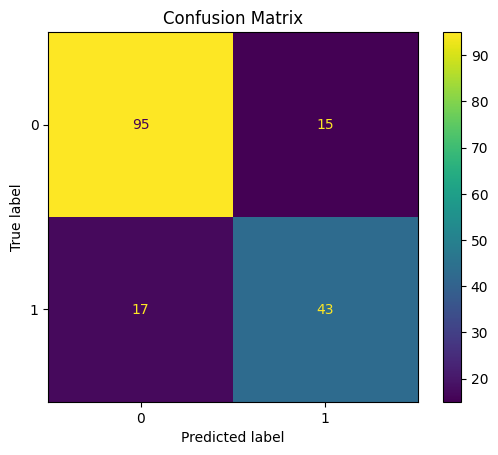

In [22]:
import matplotlib.pyplot as plt
# Visualizing Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix")
plt.show()

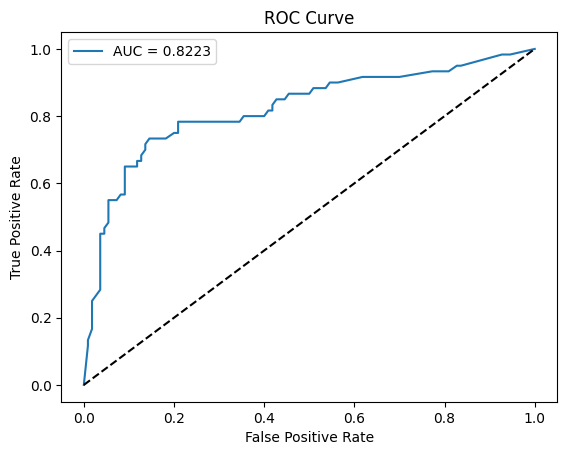

In [23]:
# Visualizing ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()